In [235]:
from numpy import genfromtxt
from _cmeans import cmeans
import re
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import csv
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay
import itertools

In [23]:
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

In [24]:
def isint(value):
  try:
    int(value)
    return True
  except ValueError:
    return False

In [25]:
#https://www.kaggle.com/reubencpereira/spatial-data-repo
text_file = open("kivaData_augmented.txt", "r", encoding="utf8")
lines = text_file.read().split('\n')
text_file.close()
arr = []
for l in  csv.reader(lines, quotechar='"', delimiter=',', quoting=csv.QUOTE_ALL, skipinitialspace=True):
    if(len(l)>2):
        #Filter für nicht vorhandene Werte!
        if(#isfloat(l[2]) 
           #& isfloat(l[3])
             isfloat(l[26]) #Niederschlag
           & isint(l[29]) #Landnutzungsklassifikator
           & isint(l[31]) #Temperatur
          # & isint(l[30]) #Höhenwerte
          # & isint(l[27]) #Reisezeit bis zur nächsten Großstadt in Stunden
          # & isint(l[28]) #Durchschnittliche nächtliche Beleuchtungszeit (Reflektionsgrade 1-63)
          # & isfloat(l[25])#Populationsdichte (Bewohner pro Quadratkilometer)
                            ): 
            arr.append(l)
        elif(l[0]=="region"):
            arr.append(l)

In [26]:
#In numpy-Array umwandeln und die Legende entfernen
data = np.empty([len(arr)-1,len(arr[0])],dtype=object)
for l in range(1,len(arr)):
        data[l-1] = arr[l]

In [27]:
#Index Legende:
for i in range(0,43):
    print("Index "+str(i)+": "+str(arr[0][i]))

Index 0: region
Index 1: country
Index 2: latitude
Index 3: longitude
Index 4: id
Index 5: funded_amount
Index 6: loan_amount
Index 7: activity
Index 8: sector
Index 9: use
Index 10: country_code
Index 11: currency
Index 12: partner_id
Index 13: posted_time
Index 14: disbursed_time
Index 15: funded_time
Index 16: term_in_months
Index 17: lender_count
Index 18: tags
Index 19: borrower_genders
Index 20: repayment_interval
Index 21: date
Index 22: location_type
Index 23: latlngImputed
Index 24: useforspatial
Index 25: popDensity
Index 26: precipitation
Index 27: TimeToCity
Index 28: AvgNightLight
Index 29: LandClassification
Index 30: Elevation
Index 31: Temperature
Index 32: Evaporation
Index 33: Modis_LAI
Index 34: Modis_EVI
Index 35: soil_orgc
Index 36: soil_phaq
Index 37: soil_clay
Index 38: soil_silt
Index 39: soil_sand
Index 40: Conflicts_total
Index 41: Conflicts_totalDeaths
Index 42: Conflicts_totalDeathsCivilians


In [28]:
data[:,29] #Daten eines Attributs

array(['20', '20', '20', ..., '20', '110', '110'], dtype=object)

In [8]:
###########################################################################################
###########################################################################################
###########################################################################################
#Anderer Datensatz mit mehr Punkten, aber weniger Dimensionen
#http://download.geonames.org/export/zip/
###########################################################################################
###########################################################################################
###########################################################################################
text_file = open("allCountries.txt", "r", encoding="utf8")
ac_lines = text_file.read().split('\n')
text_file.close()
geonames = np.empty([np.size(ac_lines)-1,np.size(ac_lines[0].split('\t'))],dtype=object)
for i in range(0,np.size(ac_lines)-1):
    geonames[i] = ac_lines[i].split('\t')

In [9]:
geonames.shape

(1264940, 12)

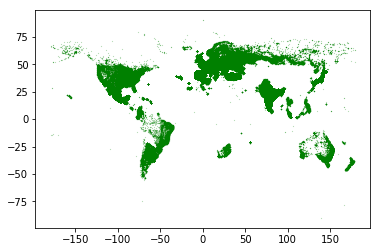

In [10]:
weltplot = plt.plot(geonames[0:,10].astype(float), geonames[0:,9].astype(float), 'g.')
plt.setp(weltplot, markersize=0.2)
plt.show()

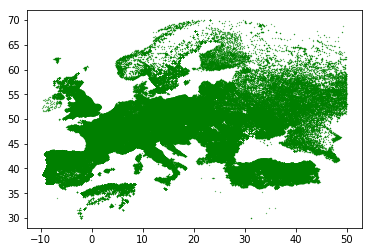

In [11]:
#Ausschnitt betrachten:
breitengrad = geonames[0:,9].astype(float)
laengengrad = geonames[0:,10].astype(float)
condition = [(breitengrad>30) & (breitengrad <70) & (laengengrad>-10) & (laengengrad <50)]
cond_a = np.extract(condition, breitengrad)
cond_b = np.extract(condition, laengengrad)
euplot = plt.plot(cond_b,cond_a, 'g.')
plt.setp(euplot, markersize=0.5)
plt.show()
###########################################################################################
###########################################################################################
###########################################################################################

In [155]:
#Fuzzy C-Means
niederschlag = data[:,26][0::1].astype(float) #Entsprechende Spalten auswählen, numerisieren und mit slicing neutralisieren
landnutzung = data[:,29][0::1].astype(float)
temperatur = data[:,31][0::1].astype(float)

fcm_data = np.vstack((temperatur,landnutzung,niederschlag)) #In Datenmatrix umwandeln für den Algorithmus

In [110]:
[cntr,u,_,_,_,_,_] = cmeans(fcm_data, c=30, m=2, error=0.001, maxiter=100)

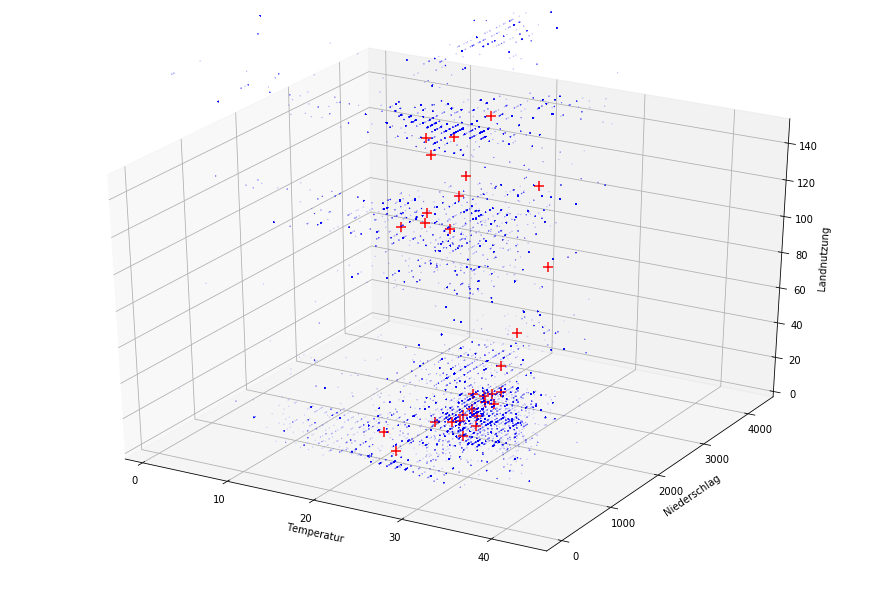

In [154]:
fig = plt.figure(figsize=(12,8)) 
ax = Axes3D(fig)

sequence_containing_y_vals = data[:,26][0::20].astype(float) 
sequence_containing_z_vals = data[:,29][0::20].astype(int) 
sequence_containing_x_vals = data[:,31][0::20].astype(int)

ax.scatter(cntr.T[0], cntr.T[2], cntr.T[1], alpha = 1, s=100,c='r', marker='+',zorder=0)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals,s=0.1,c='b',marker='.',zorder=-1)

ax.set_ylabel('Niederschlag')
ax.set_zlabel('Landnutzung')
ax.set_xlabel('Temperatur')

#ax.set_xlim(0,35)
#ax.set_ylim(20,40)
ax.set_zlim(0,150)

plt.show()

#Scheinbar zeigt FCM in diesem sehr unscharfen Fall erst bei hoher Clusteranzahl korrekte Gruppierungstendenzen an.

In [ ]:
#Local Outlier Factor? zurückgestellt

In [ ]:
#NSFCDT

In [343]:
#points = np.array([[0, 0,1], [0, 1,1], [1, 0,1], [0, 0,0],[1, 1,1],[1, 1,0]])
points = np.array([[0, 0], [0, 1], [1,1],[10,1],[1,4]])
tri = Delaunay(points)
#points[tri.simplices]

In [331]:
def getVerts(pts):
    verts = []
    for polygon in points[tri.simplices]:
        l = []
        for point in polygon:
            l.append(tuple(point))
        verts.append(l)
    return verts

In [332]:
[getVerts(points[tri.simplices])[0]]

[[(16, 1), (1, 1), (0, 0)]]

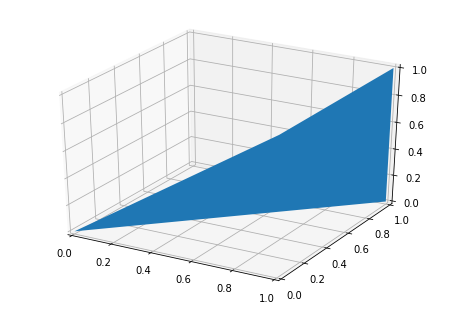

In [127]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)
verts = [getVerts(points[tri.simplices])[3]]
ax.add_collection3d(Poly3DCollection(verts), zs='z')
plt.show()

In [333]:
class Triangle:
    def __init__(self):
        self.id = -1
        self.points = []
        self.visited = False
        self.neighbors = []

In [334]:
def convertTriangles(points,triangulation):
    convertedTriangles = []
    for i in range(0,len(triangulation.simplices)):
        newT = Triangle()
        newT.id = i
        newT.points = points[triangulation.simplices[i]] #Achtung: ein 2-Simplex ist ein Dreieck.
        newT.neighbors = finde_nachbardreiecke(i,tri)
        convertedTriangles.append(newT)
    return convertedTriangles

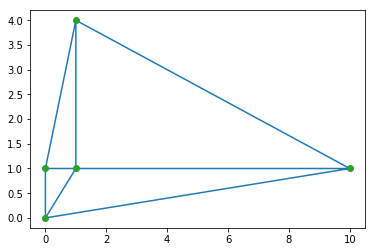

In [344]:
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [345]:
np.linalg.norm(points[tri.simplices[0]][0]-points[tri.simplices[0]][1])

9.0

In [346]:
#Alle Nachbarn eines Dreiecks finden:
def finde_nachbardreiecke(dindex,tri):
    nachbarn = []
    for comb in itertools.combinations(tri.simplices[dindex], 2):
        for sid in range(0,len(tri.simplices)): #für alle Simplexindizes
            if((len(set(comb)-set(tri.simplices[sid])) == 0) 
                  & (not np.array_equal(tri.simplices[dindex],tri.simplices[sid]))): #Sind an dem Dreieck tri.simplices[sid] alle Kanten aus 'comb' beteiligt?
                nachbarn.append(sid)#Dann ist tri.simplices[sid] ein Nachbardreieck von tri.simplices[dindex]
    return nachbarn

In [349]:
finde_nachbardreiecke(2,tri) #Dreieck 0 hat also die Nachbarn 1 und 2

[3, 0]

In [364]:
def satisfiable(t,limit): #Berechne Fläche des Dreiecks und überprüfe, ob klein genug bzgl. des Grenzwertes
    a = np.linalg.norm(t.points[0]-t.points[1])
    b = np.linalg.norm(t.points[0]-t.points[2])
    c = np.linalg.norm(t.points[1]-t.points[2])
    s = (a + b + c) / 2
    area = (s*(s-a)*(s-b)*(s-c)) ** 0.5
    if(area < limit):
        return True
    else:
        return False

In [366]:
def NSFCDT(points,limit):
    triangulation = Delaunay(points)
    DT = convertTriangles(points,triangulation)
    clusterSet = set()
    newSet = set()
    tmpSet = set()
    stack = []
    for dt in DT:
        if(dt.visited == False):
            #newset init
            stack.append(dt)
            while(len(stack) > 0):
                t = stack.pop()
                if(satisfiable(t,limit) & (t.visited == False)):
                    t.visited = True
                    newSet = newSet.union({t}) 
                    tmpSet = t.neighbors
                    for el in tmpSet:
                        if(DT[el].visited == False):
                            stack.append(DT[el])
            clusterSet = clusterSet.union(newSet)
    return clusterSet
    

In [370]:
NSFCDT(points,10)

{<__main__.Triangle at 0x1ef0d5bd1d0>,
 <__main__.Triangle at 0x1ef0d5bde80>}

In [ ]:
#CFGWC

In [ ]:
#cOpt mit Fuzzy Hypervolume

In [ ]:
#VAT?

In [ ]:
#Rand-Index

In [ ]:
#Partitionierungsstabilität